In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Preparing for graphics

import seaborn as sns
cm = sns.light_palette("blue", as_cmap=True)
sns.set(rc={'figure.figsize':(16,9)})

In [2]:
apps = pd.read_csv('Datasets/apps.csv')
link_data = pd.read_csv('Datasets/link_data.csv')
orders = pd.read_csv('Datasets/orders.csv')

In [4]:
# Preparing and clean data

apps['AppId'] = [c.replace('Application.', '') for c in apps['AppId']]
apps = apps[apps['AppId'] != 'Restaurant']
apps['StartHour'] = [pd.to_datetime(c, format='%Y-%m-%dT%H:%M:%S.%fZ').hour for c in apps['StartTime']]
apps['EndHour'] = [pd.to_datetime(c, format='%Y-%m-%dT%H:%M:%S.%fZ').hour for c in apps['EndTime']]
apps['Week'] = [pd.to_datetime(c, format='%Y-%m-%dT%H:%M:%S.%fZ').isocalendar()[2] for c in apps['StartTime']]

In [6]:
# Новые колонки с днем недели и временем осуществления заказа
orders['Hour'] = orders['Time'].apply(hour)
orders['Week'] = orders['Time'].apply(week_day)

,OrderId,Revenue,SessionId,Time,Hour,Week
0,559060,65.0,a23976b2-9e48-4fb9-9d30-11cda95ba186,2018-02-21 20:26:37.073,20,3
1,559321,48.0,09c00da0-9813-4cb3-bc9d-074dade4eae7,2018-02-24 09:46:35.343,9,6
2,559653,37.0,a9204130-983e-4c23-afb7-009d5dcf0768,2018-02-24 20:41:48.210,20,6
3,559724,20.0,76e95fb6-8c25-4f28-b13a-bb5e453fee09,2018-02-25 10:51:21.433,10,7
4,559985,92.0,4593d9ca-3317-49c6-93ec-24523713580c,2018-02-25 22:07:41.747,22,7


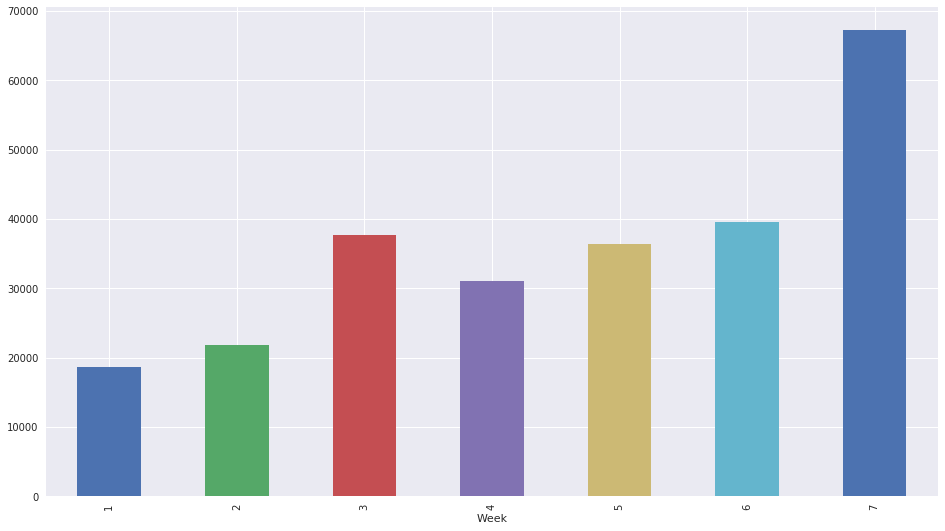

In [7]:
# Суммарная прибыль за день недели
revenue_sum = orders.groupby('Week')['Revenue'].sum()
revenue_sum.plot.bar();

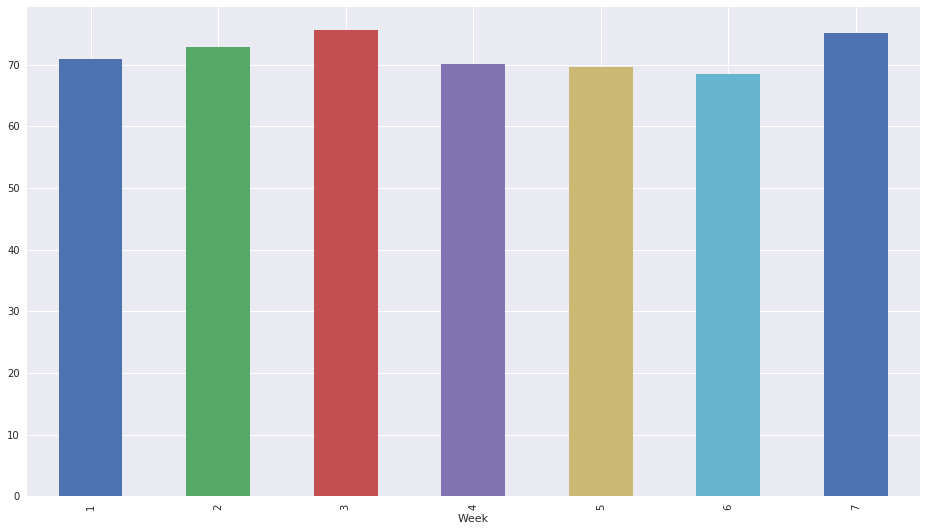

In [8]:
# Средняя прибыль
orders.groupby('Week')['Revenue'].mean().plot.bar();

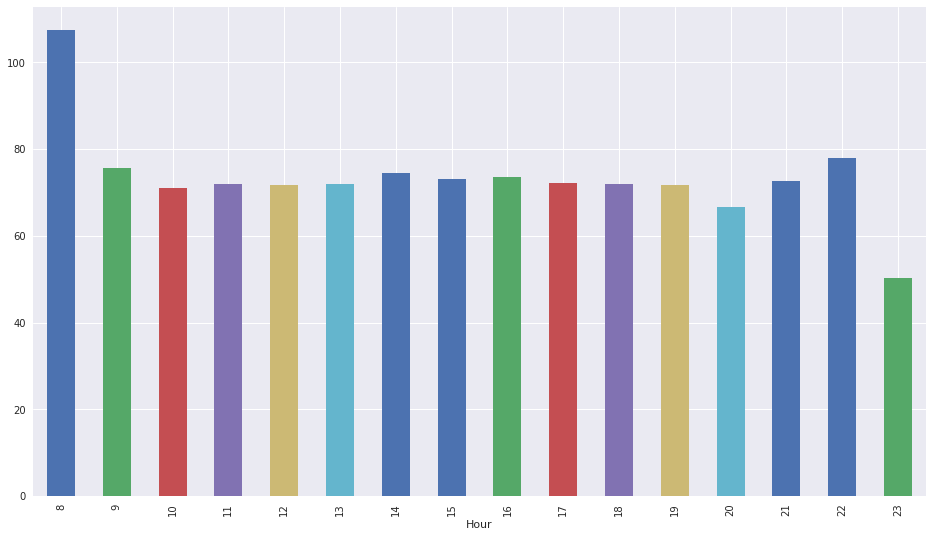

In [9]:
# Тоже самое только для времени заказа
hour_revenue = orders.groupby('Hour')['Revenue'].mean()
hour_revenue.plot.bar();

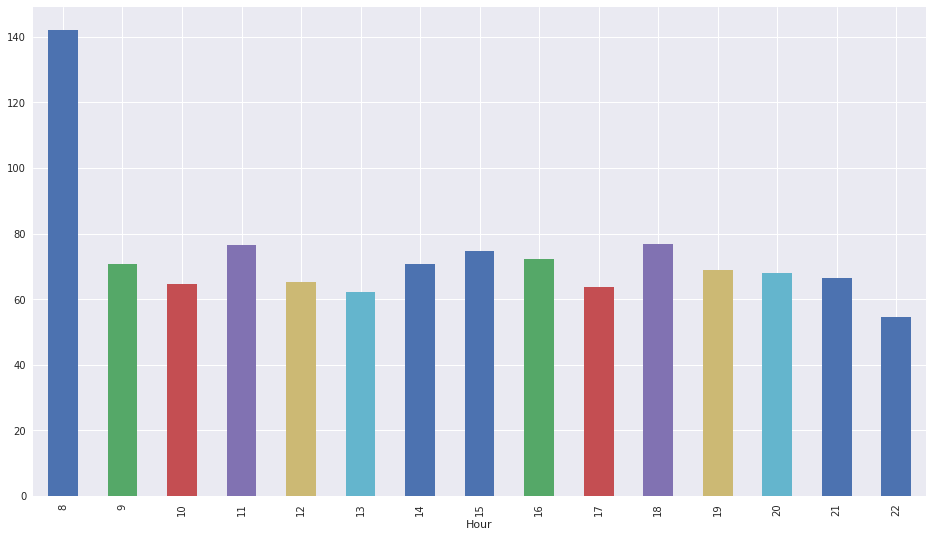

In [10]:
# Средняя прибыль по времени за определенный день недели
orders[orders['Week'] == 4].groupby('Hour')['Revenue'].mean().plot.bar();

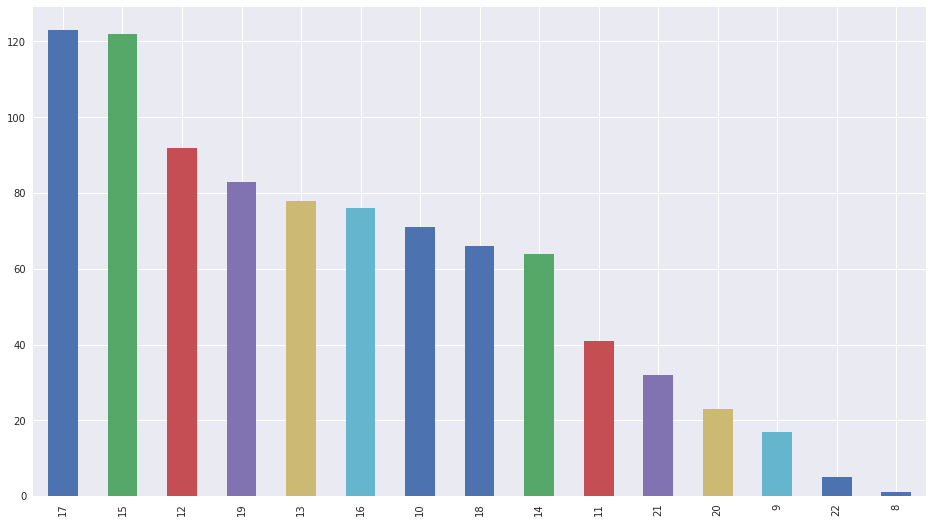

In [11]:
# Популярность ресторана час/день
orders[orders['Week'] == 7]['Hour'].value_counts().plot.bar();

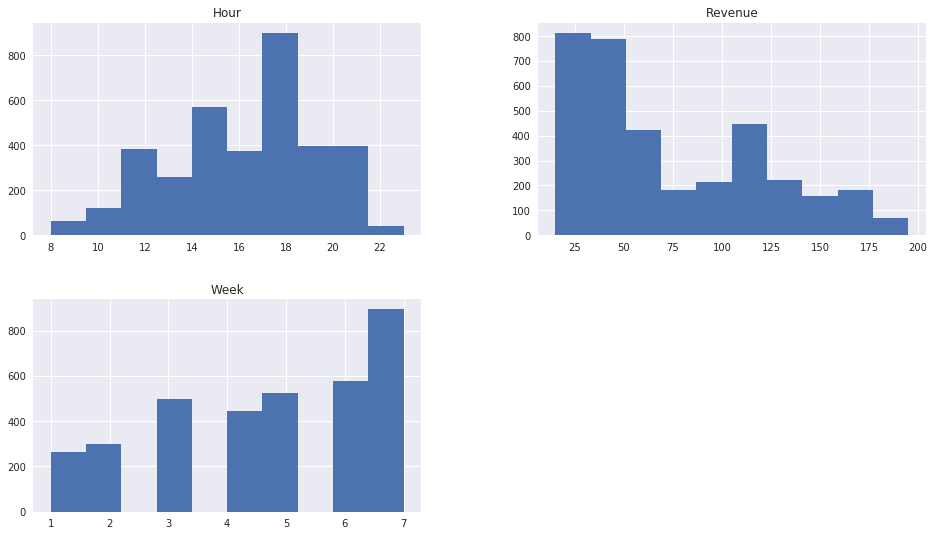

In [12]:
orders[['Week', 'Hour', 'Revenue']].hist();

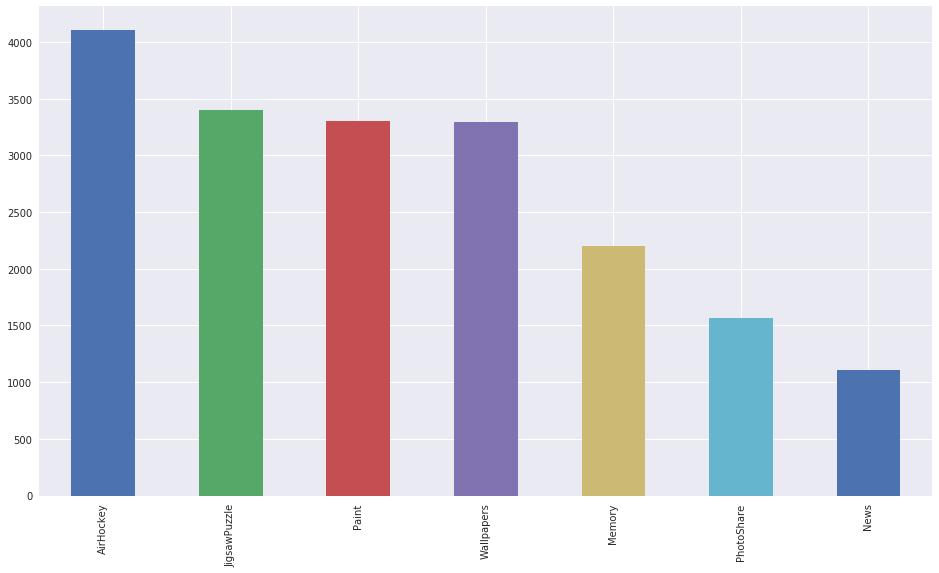

In [13]:
# самые популярные приложения
apps['AppId'].value_counts().plot.bar();

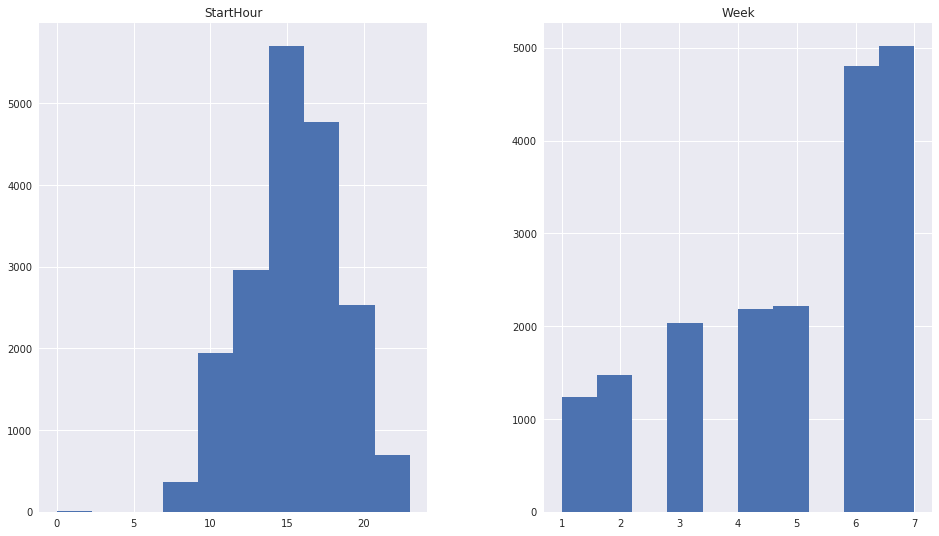

In [14]:
apps[['StartHour', 'Week']].hist();

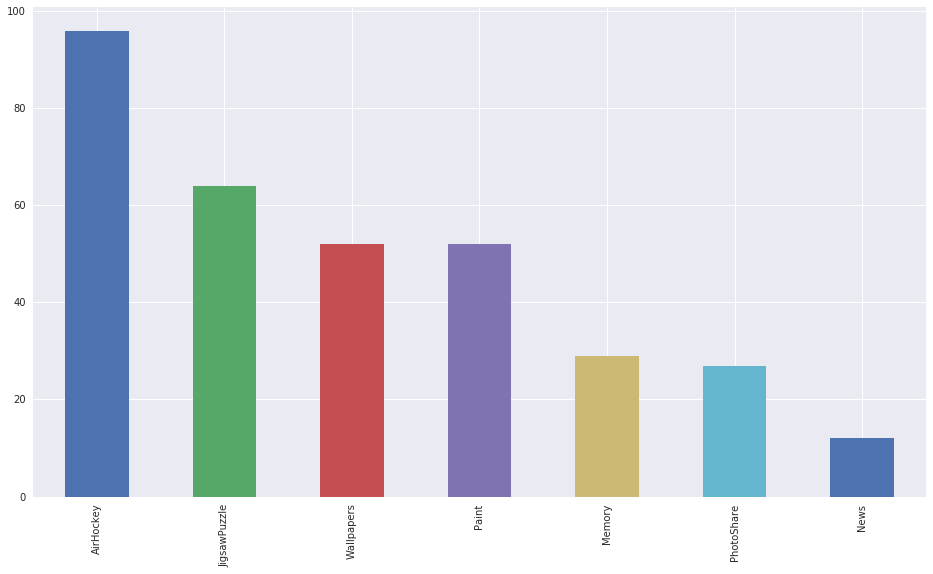

In [15]:
# популярность приложения в зависимости от дня недели и времени

week_hour = (apps[(apps['StartHour'] == 17) & (apps['Week'] == 4)]['AppId'].value_counts())

if len(week_hour) > 0:
    week_hour.plot.bar()
else:
    print('no apps was opened')

In [16]:
print(apps['AppId'].value_counts().quantile(.75) , \
apps['StartHour'].value_counts().quantile(.75), \
apps['Week'].value_counts().quantile(.75))

3352.0 1729.75 3511.0


In [17]:
apps['AppId'].value_counts()

AirHockey       4110
JigsawPuzzle    3398
Paint           3306
Wallpapers      3293
Memory          2205
PhotoShare      1563
News            1109
Name: AppId, dtype: int64

In [18]:
apps['AppId'].value_counts() >= apps['AppId'].value_counts().quantile(.75)

AirHockey        True
JigsawPuzzle     True
Paint           False
Wallpapers      False
Memory          False
PhotoShare      False
News            False
Name: AppId, dtype: bool

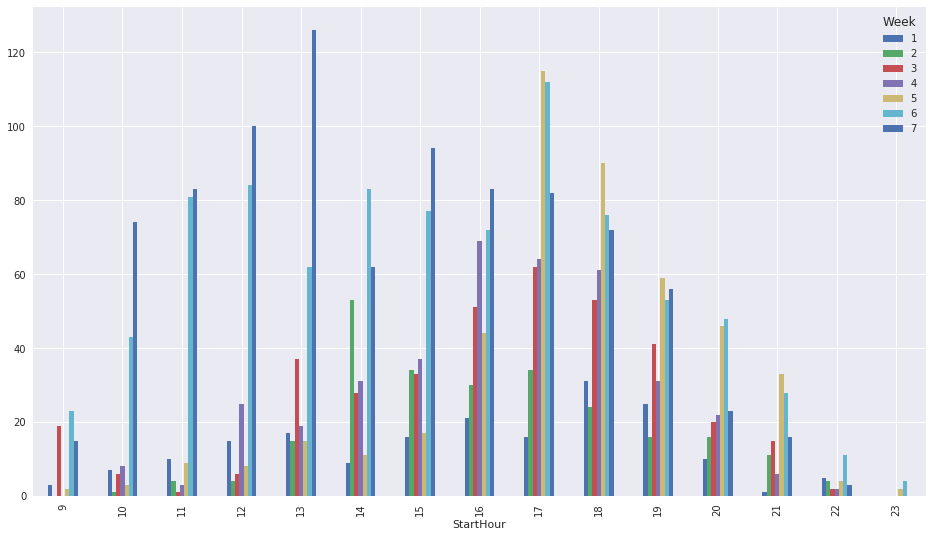

In [19]:
# hour_betwen = apps[(apps['StartHour'] >= 14) & (apps['StartHour'] < 20)]['StartHour']
air_h = apps[(apps['AppId'] == 'JigsawPuzzle') & (apps['StartHour'] > 8)]
pd.crosstab(air_h['StartHour'], air_h['Week'], rownames=['StartHour'], colnames=['Week']).plot.bar();

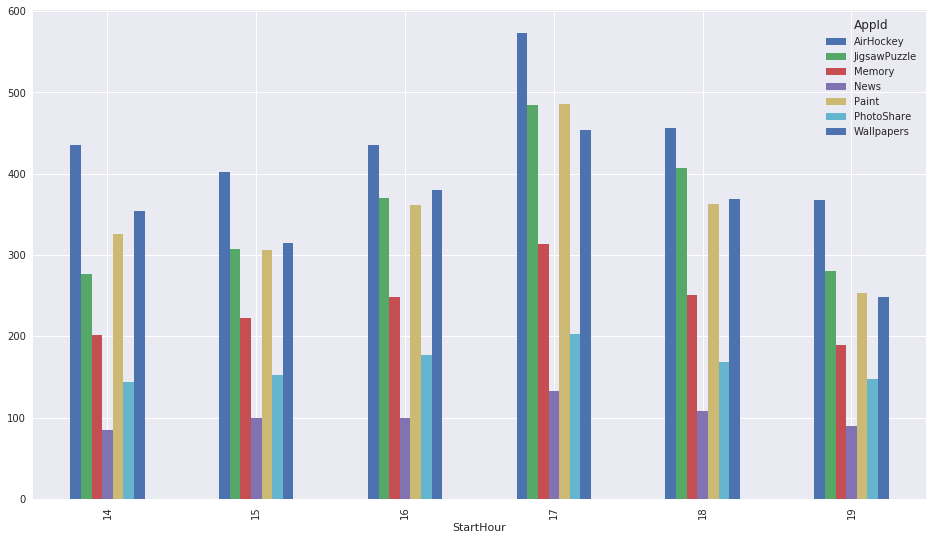

In [20]:
hour_betwen = apps[(apps['StartHour'] >= 14) & (apps['StartHour'] < 20)]
hour_app = pd.crosstab(hour_betwen['StartHour'], hour_betwen['AppId'], rownames=['StartHour'], colnames=['AppId'])
hour_app.plot.bar();

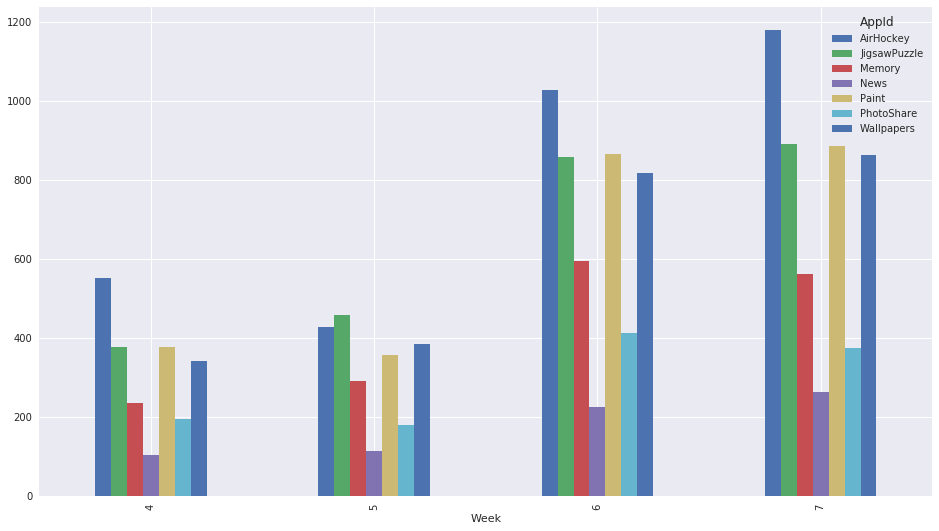

In [21]:
week_betwen = apps[(apps['Week'] >= 4) & (apps['Week'] < 8)]['Week']
week_app = pd.crosstab(week_betwen, apps['AppId'], rownames=['Week'], colnames=['AppId'])
week_app.plot.bar();

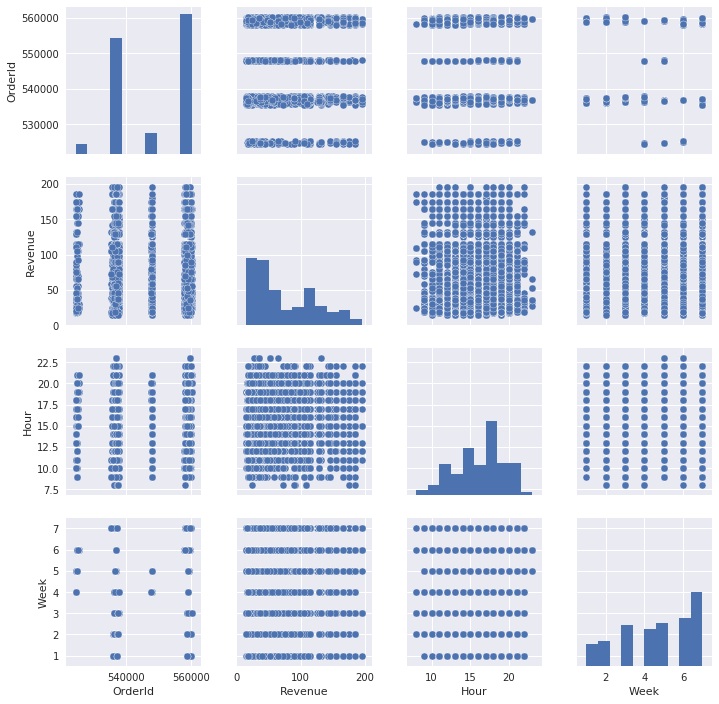

In [22]:
sns.pairplot(orders);

In [23]:
orders['Revenue'].value_counts().describe()

count     61.000000
mean      57.377049
std       59.604855
min        1.000000
25%       14.000000
50%       42.000000
75%       69.000000
max      315.000000
Name: Revenue, dtype: float64

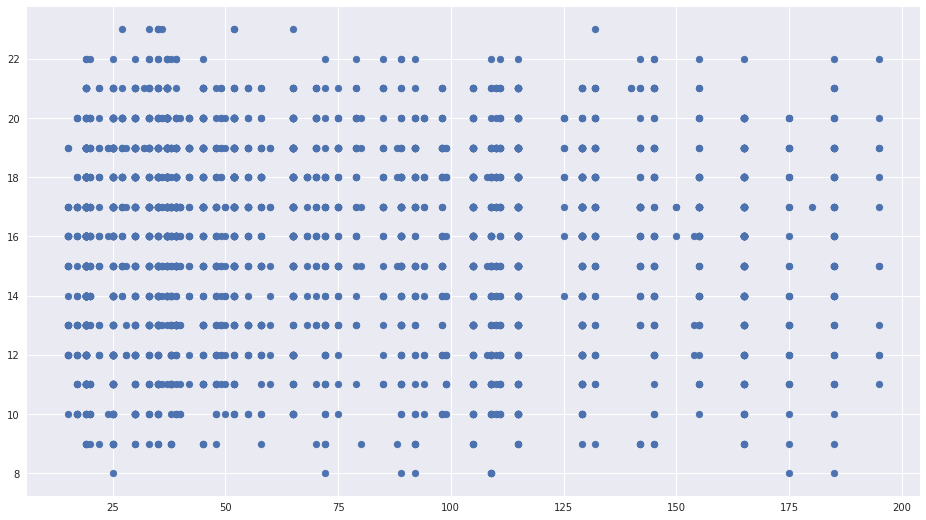

In [24]:
pas_rev = orders[orders['Revenue'] <= 200]
plt.scatter(pas_rev['Revenue'], pas_rev['Hour']);

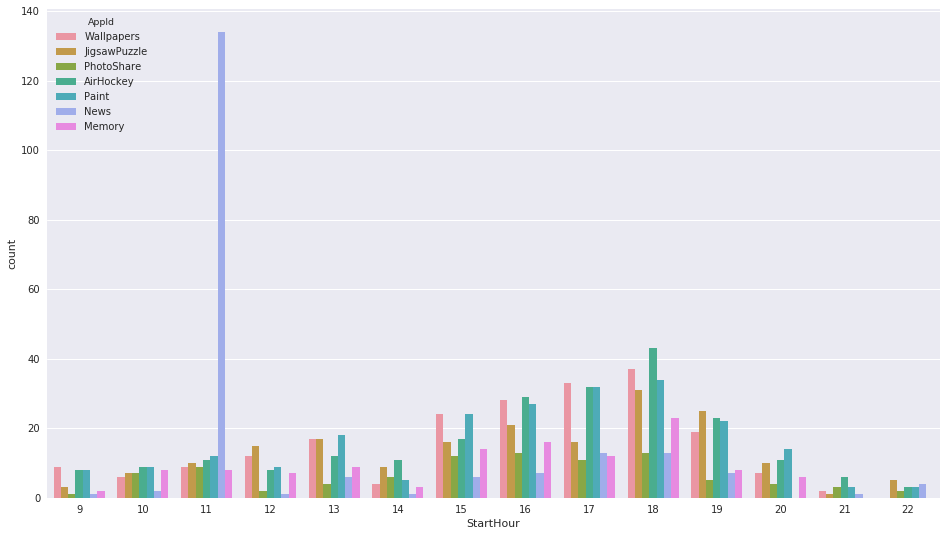

In [25]:
# частота открытия прилождения в определенный день
sns.countplot(x='StartHour', hue='AppId', data=apps[(apps['Week'] == 1) & (apps['StartHour'] > 8)]);